In [11]:
!pip install pandas_datareader


Defaulting to user installation because normal site-packages is not writeable


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
import pandas_datareader as pdr

# Define the parameters for fetching data
ticker = 'AAPL'  # Example: Apple stock
data_source = 'yahoo'  # Example: Yahoo Finance
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch the data
df = pdr.DataReader(ticker, data_source, start_date, end_date)

# Display the first few rows of the DataFrame
print(df.head())


TypeError: string indices must be integers, not 'str'

In [14]:
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable


In [22]:
import yfinance as yf

# Define the ticker symbol
ticker = 'AAPL'  # Example: Apple stock

# Fetch historical data
df = yf.download(ticker, start='2016-01-01', end='2024-02-28')

# Display the first few rows of the DataFrame
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  23.946920  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.346823  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  22.889935  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  21.923874  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.039801  283192000


In [23]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41529700
2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52292200
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45119700
2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900


In [24]:
df=df.reset_index()

In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,23.946920,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.346823,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.889935,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.923874,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.039801,283192000


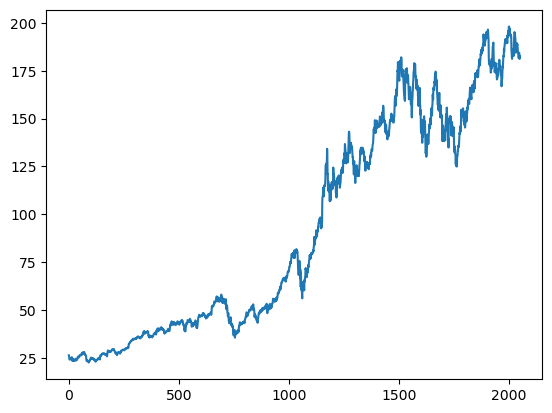

In [26]:
plt.plot(df.Close)

In [27]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2046    185.1912
2047    185.3280
2048    185.4411
2049    185.5152
2050    185.6175
Name: Close, Length: 2051, dtype: float64

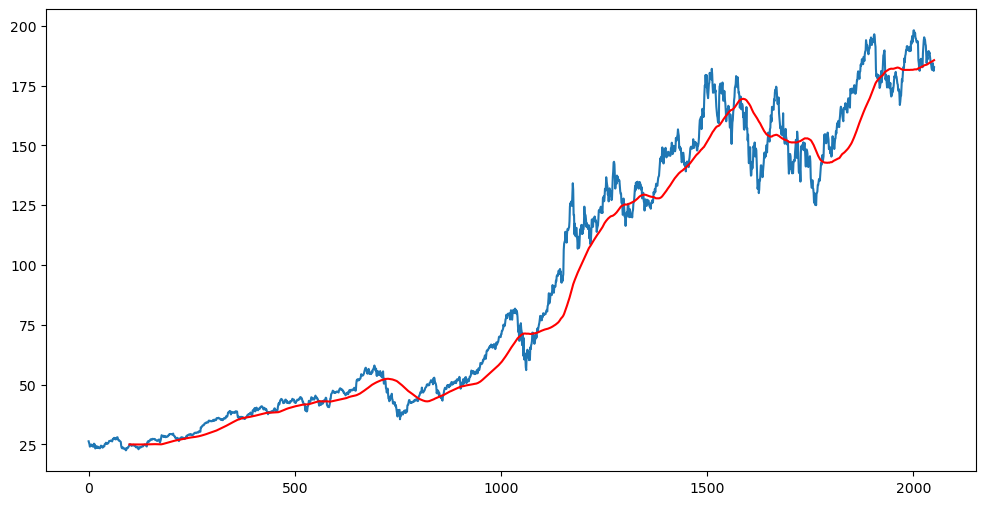

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [29]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2046    183.63355
2047    183.68755
2048    183.73265
2049    183.77960
2050    183.82495
Name: Close, Length: 2051, dtype: float64

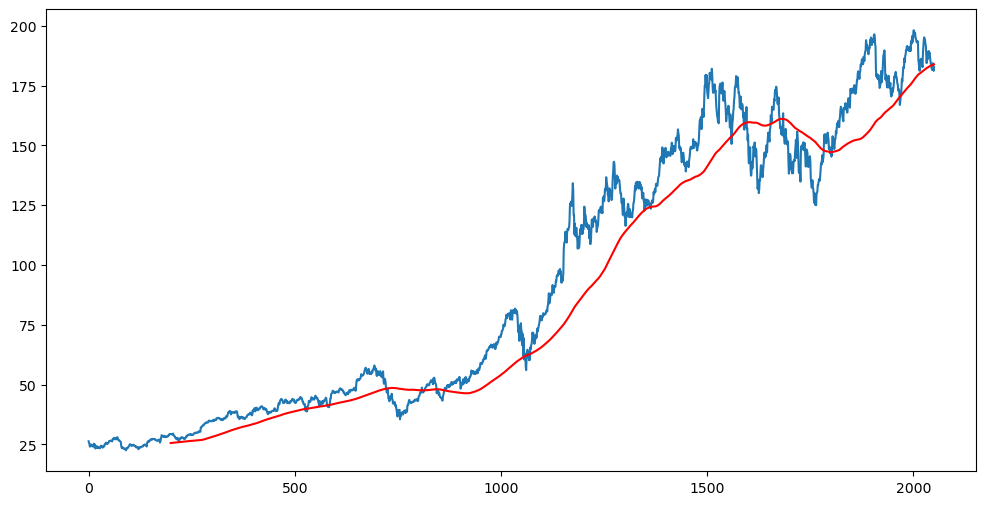

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')

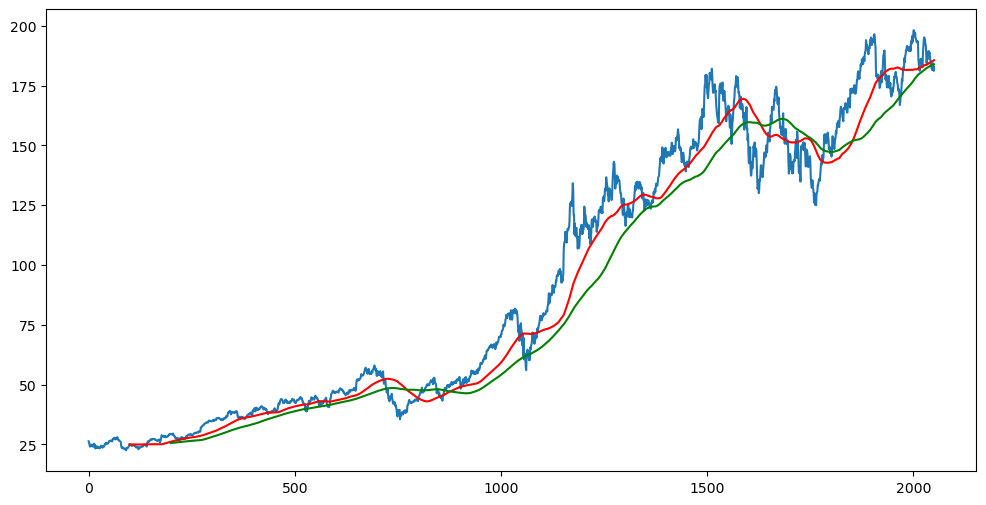

In [31]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [32]:
df.shape


(2051, 7)

In [33]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1435, 1)
(616, 1)


In [34]:
data_training.head()


,Close
0,26.337500
1,25.677500
2,25.174999
3,24.112499
4,24.240000


In [35]:
data_testing.head()

,Close
1435,149.029999
1436,148.789993
1437,146.059998
1438,142.940002
1439,143.429993


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [37]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02798181],
       [0.02306029],
       [0.01931323],
       ...,
       [0.94243316],
       [0.94675814],
       [0.9360948 ]])

In [40]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [41]:
#ML Model


In [42]:
from sklearn import svm

# Create SVM model
model = svm.SVC()


In [47]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   --------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^

   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/s eta 0:54:37
   --- ------------------------------------ 9.4/99.8 MB 27.6 kB/